### Assumptions:
    Clusters are of spherical shape
    Clusters are of similar size
    
### Advantages:
    Simple & Fast(than Hierarchical if 'K' is small)
    Ideal or medium to large datasets
    Produces tight clusters than Hierarchical as the objective is to minimize the within cluster variation

### Disadvantages:
    Choosing 'K' value is difficult
    Order of observations has an impact on the results
    Builds spherical clusters
    Unscaled and scaled data will give different results


In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv('cars.csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [35]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df)
df_normalized = normalize(df_scaled)

In [36]:
df_normalized = pd.DataFrame(df_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.428666,0.754916,-0.156574,-0.437588,-0.174210
1,-0.464003,0.724331,-0.128693,-0.480987,-0.110163
2,-0.463159,0.723014,-0.128459,-0.480112,-0.125404
3,-0.506921,0.753036,-0.185025,-0.347461,-0.144929
4,-0.459611,0.717104,-0.123520,-0.490366,-0.137127


In [37]:
df_normalized.columns = df.columns
df_normalized.head()

,HP,MPG,VOL,SP,WT
0,-0.428666,0.754916,-0.156574,-0.437588,-0.174210
1,-0.464003,0.724331,-0.128693,-0.480987,-0.110163
2,-0.463159,0.723014,-0.128459,-0.480112,-0.125404
3,-0.506921,0.753036,-0.185025,-0.347461,-0.144929
4,-0.459611,0.717104,-0.123520,-0.490366,-0.137127


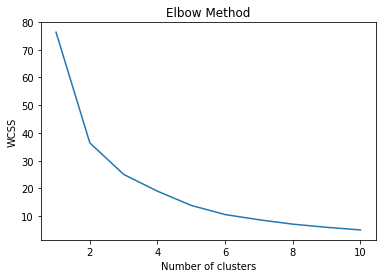

In [38]:
wcss = []
for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_3 = KMeans(n_clusters=3)
kmeans_4 = KMeans(n_clusters=4)
kmeans_5 = KMeans(n_clusters=5)
kmeans_6 = KMeans(n_clusters=6)
kmeans_7 = KMeans(n_clusters=7)
kmeans_8 = KMeans(n_clusters=8)
kmeans_9 = KMeans(n_clusters=9)
kmeans_10 = KMeans(n_clusters=10)

In [40]:
Cluster = kmeans_2.fit_predict(df_normalized)
Cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
df_normalized_array = df_normalized.values

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

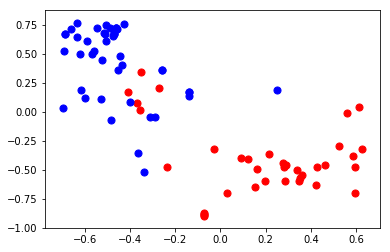

In [42]:
plt.scatter(df_normalized_array[Cluster==0, 0], df_normalized_array[Cluster==0, 1], s=50, marker='o', color='red')
plt.scatter(df_normalized_array[Cluster==1, 0], df_normalized_array[Cluster==1, 1], s=50, marker='o', color='blue')
plt.scatter(df_normalized_array[Cluster==2, 0], df_normalized_array[Cluster==2, 1], s=50, marker='o', color='green')
plt.scatter(df_normalized_array[Cluster==3, 0], df_normalized_array[Cluster==3, 1], s=50, marker='o', color='purple')
plt.scatter(df_normalized_array[Cluster==4, 0], df_normalized_array[Cluster==4, 1], s=50, marker='o', color='orange')
plt.scatter(df_normalized_array[Cluster==5, 0], df_normalized_array[Cluster==5, 1], s=50, marker='o', color='yellow')
plt.show()

In [43]:
df_normalized['Cluster'] = Cluster

In [44]:
cluster_centroids = kmeans_2.fit(df_normalized[['HP', 'MPG', 'VOL', 'SP', 'WT']]).cluster_centers_
cluster_centroids

array([[-0.46094075,  0.4272187 , -0.18531009, -0.41391471, -0.1889273 ],
       [ 0.18385743, -0.41618186,  0.31672455,  0.18390137,  0.31947431]])

In [45]:
global_centroid = cluster_centroids.sum(0)
global_centroid

array([-0.27708333,  0.01103684,  0.13141447, -0.23001334,  0.130547  ])

In [46]:
from scipy.spatial import distance
# distance.euclidean(x[0], centroid[1])
withinss = []
for i in range(len(df_normalized_array)):
    for j in range(len(cluster_centroids)):
            if df_normalized['Cluster'][i] == j:
                dist = (distance.euclidean(cluster_centroids[j], df_normalized_array[i]))**2
                withinss.append(dist)

        
    
tot_withinss = np.asarray(withinss).sum(0)
   
    
totss = []  
for i in range(len(df_normalized_array)):
    d = (distance.euclidean(global_centroid, df_normalized_array[i]))**2
    totss.append(d)

totss = np.asarray(totss).sum()

btwss = totss - tot_withinss

print("tot_withinss:", tot_withinss)
print('\n')
print("totss:", totss)
print('\n')
print("btwss:", btwss)

tot_withinss: 198.00286151280827


totss: 79.26181145115548


btwss: -118.74105006165279


In [ ]:

# plt.scatter(df_normalized[:,0], df_normalized[:,1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.show()

In [48]:
df['Cluster'] = Cluster

In [49]:
df.groupby('Cluster')[['HP', 'MPG', 'VOL', 'SP', 'WT']].mean().reset_index()

,Cluster,HP,MPG,VOL,SP,WT
0,0,159.583333,26.563517,110.722222,131.794262,36.433402
1,1,83.777778,40.708923,89.200000,113.337080,29.195917
